[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dipay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dipay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dipay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


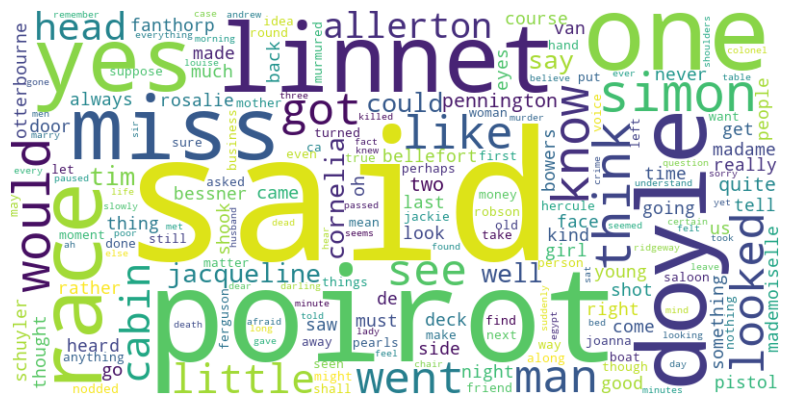

In [2]:
import re
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize  # Import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the text data
file_path = 'C:/Users/dipay/Downloads/Agatha Christie - Death On The Nile.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()
    
# Preprocess the text
# Tokenization
words = word_tokenize(text.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalnum() and word not in stop_words]

# Join words back into a single string
processed_text = ' '.join(words)

# Compute TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([processed_text])
tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]))

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
